In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
#!pip install pandas pyarrow
import pyarrow



import pyarrow.parquet as pq

movies = pq.read_table(source="../data/raw/df_90000_99999.parquet.gzip").to_pandas()
movies


,adult,id,original_title,popularity,video,url,poster_url,genre_id
90000,False,141601,Planetfall,1.465,False,https://www.themoviedb.org/movie/141601,None,[]
90001,False,141603,Gunda,0.624,False,https://www.themoviedb.org/movie/141603,None,[28]
90002,False,141604,Hasten Slowly: The Journey of Sir Laurens van ...,0.600,False,https://www.themoviedb.org/movie/141604,None,[99]
90003,False,141605,Murder Was the Case: The Movie,1.224,False,https://www.themoviedb.org/movie/141605,https://www.themoviedb.org/t/p/w500//cKEuVikXQ...,"[10402, 99]"
90004,False,141607,Parade of the Dead,1.045,False,https://www.themoviedb.org/movie/141607,https://www.themoviedb.org/t/p/w500//lhnrm3scq...,[10402]
...,...,...,...,...,...,...,...,...
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,"[28, 18]"
99996,False,162787,The Second Death,1.331,False,https://www.themoviedb.org/movie/162787,None,[]
99997,False,162788,The Phantom of the Air,1.487,False,https://www.themoviedb.org/movie/162788,https://www.themoviedb.org/t/p/w500//leCNbE3R1...,[28]
99998,False,162791,The Gorilla Mystery,2.032,False,https://www.themoviedb.org/movie/162791,https://www.themoviedb.org/t/p/w500//mfhxTfeXJ...,[16]


In [20]:
### Check null values

movies.isnull().sum()

# there are movies without gender 
movies = movies.drop(movies[movies['genre_id']=='[]'].index)

movies[movies['genre_id']=='[]']

# The list is a list of integers  , reason why a I made this function .

map_gender={"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":	"History",
"27":"Horror",
"10402"	:"Music",
"9648":"Mystery",
"10749":"Romance",
"878"	:"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War",
"37":"Western" }

def map_multiclass(x):
  
  tmp=[]  
  

  for y in x.split(","):
   
    y=y.replace('[', '') 
    y=y.replace(']', '') 
    y=y.replace(' ', '') 
 
    if y in map_gender:
     tmp.append(map_gender[y])
 


  return ','.join(tmp)


movies['genre_ids2']=movies['genre_id'].apply(lambda x: map_multiclass(x))



movies













,adult,id,original_title,popularity,video,url,poster_url,genre_id,genre_ids2
90001,False,141603,Gunda,0.624,False,https://www.themoviedb.org/movie/141603,None,[28],Action
90002,False,141604,Hasten Slowly: The Journey of Sir Laurens van ...,0.600,False,https://www.themoviedb.org/movie/141604,None,[99],Documentary
90003,False,141605,Murder Was the Case: The Movie,1.224,False,https://www.themoviedb.org/movie/141605,https://www.themoviedb.org/t/p/w500//cKEuVikXQ...,"[10402, 99]","Music,Documentary"
90004,False,141607,Parade of the Dead,1.045,False,https://www.themoviedb.org/movie/141607,https://www.themoviedb.org/t/p/w500//lhnrm3scq...,[10402],Music
90005,False,141610,Classic Albums: Peter Gabriel - So,3.658,False,https://www.themoviedb.org/movie/141610,https://www.themoviedb.org/t/p/w500//kwNfpafUf...,"[10402, 99]","Music,Documentary"
...,...,...,...,...,...,...,...,...,...
99994,False,162784,Les pigeons du square,2.198,False,https://www.themoviedb.org/movie/162784,https://www.themoviedb.org/t/p/w500//dbqpuPUAy...,[99],Documentary
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,"[28, 18]","Action,Drama"
99997,False,162788,The Phantom of the Air,1.487,False,https://www.themoviedb.org/movie/162788,https://www.themoviedb.org/t/p/w500//leCNbE3R1...,[28],Action
99998,False,162791,The Gorilla Mystery,2.032,False,https://www.themoviedb.org/movie/162791,https://www.themoviedb.org/t/p/w500//mfhxTfeXJ...,[16],Animation


In [21]:

## Dist of genders

## Toop 30 multiclasses

top30=pd.DataFrame(movies.genre_ids2.value_counts(normalize=True).sort_values(ascending=False)[0:30]).reset_index().rename(columns={'index': 'Multiclass'})
top30


,Multiclass,genre_ids2
0,Drama,0.136193
1,Documentary,0.106795
2,Comedy,0.101995
3,Music,0.047998
4,Western,0.034048
5,Animation,0.031348
6,Horror,0.018599
7,"Comedy,Drama",0.017699
8,Action,0.016349
9,"Drama,Romance",0.016049


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

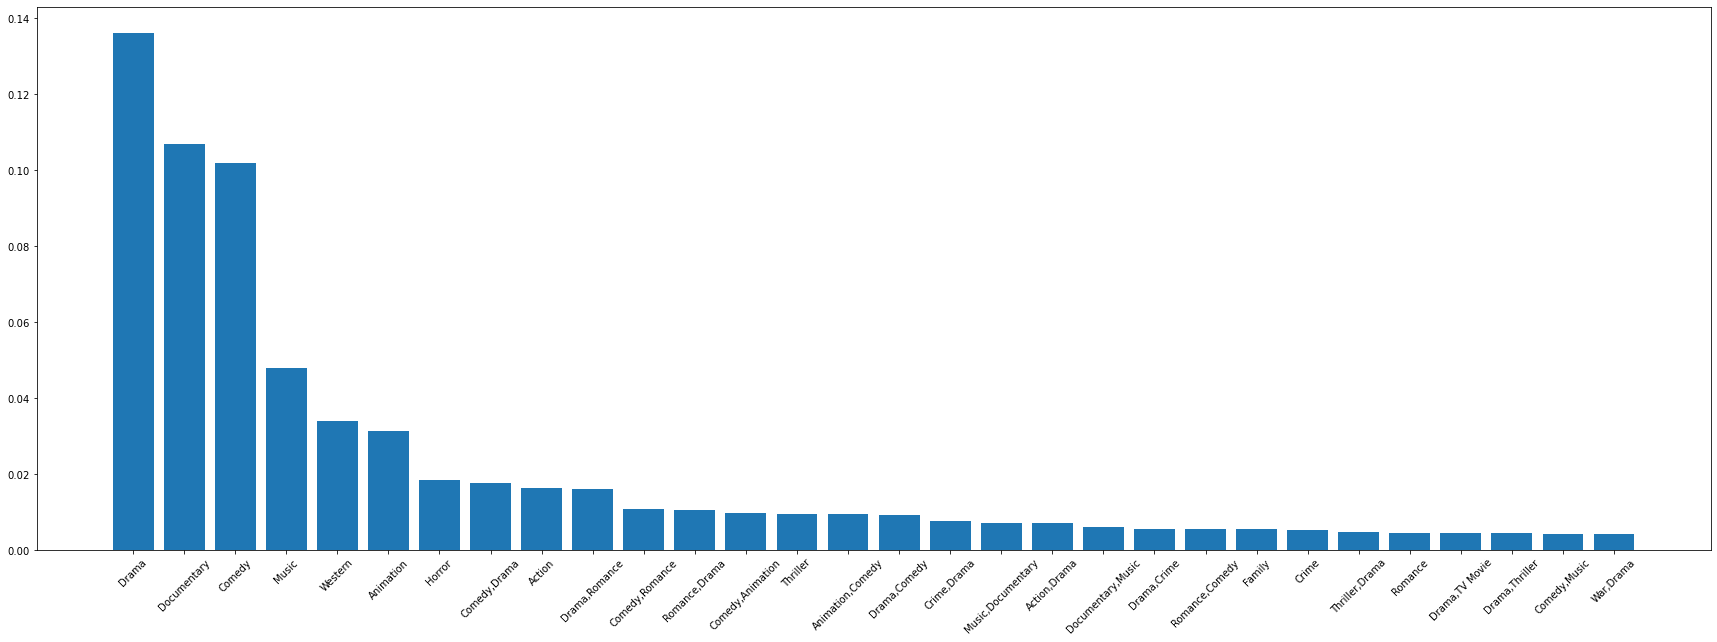

In [22]:

plt.figure(figsize=(30,10)) 
plt.bar(top30.Multiclass,top30.genre_ids2)
plt.xticks(rotation=45) 

In [23]:
## Review gender name  Explode the gender list in x rows to make a class and not multiclass

#movies= pd.read_csv('movies - movies.csv')

movies = pq.read_table(source="../data/raw/df_90000_99999.parquet.gzip").to_pandas()
movies


movies['genre_id'] = movies['genre_id'].apply(literal_eval) #convert to list type type was extrange in the excel
movie_gender=movies.explode('genre_id')

movie_gender[movie_gender.original_title=='Submarine D-1']

# the movie is x times depend on the gender 


,adult,id,original_title,popularity,video,url,poster_url,genre_id
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18


In [24]:
movie_gender.shape

(14429, 8)

In [25]:

## merge both datasets

gender_list= pd.read_csv('../data/raw/movie_genres - movie_genres.csv')

movie_gender_name=pd.merge(movie_gender,gender_list,left_on='genre_id', right_on='id')

movie_gender_name[movie_gender_name.original_title=='Submarine D-1']



,adult,id_x,original_title,popularity,video,url,poster_url,genre_id,id_y,name
597,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28,28,Action
8190,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18,18,Drama


In [26]:

## Check nulls  note poster can have null values but not the gender

movie_gender_name.isnull().sum()



adult                0
id_x                 0
original_title       0
popularity           0
video                0
url                  0
poster_url        2255
genre_id             0
id_y                 0
name                 0
dtype: int64

In [27]:
top30_separateClass=pd.DataFrame(movie_gender_name.name.value_counts()).reset_index().rename(columns={'index': 'class_'})
top30_separateClass

,class_,name
0,Drama,2352
1,Comedy,1777
2,Documentary,933
3,Music,609
4,Animation,608
5,Romance,604
6,Action,599
7,Thriller,455
8,Crime,441
9,Horror,412


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

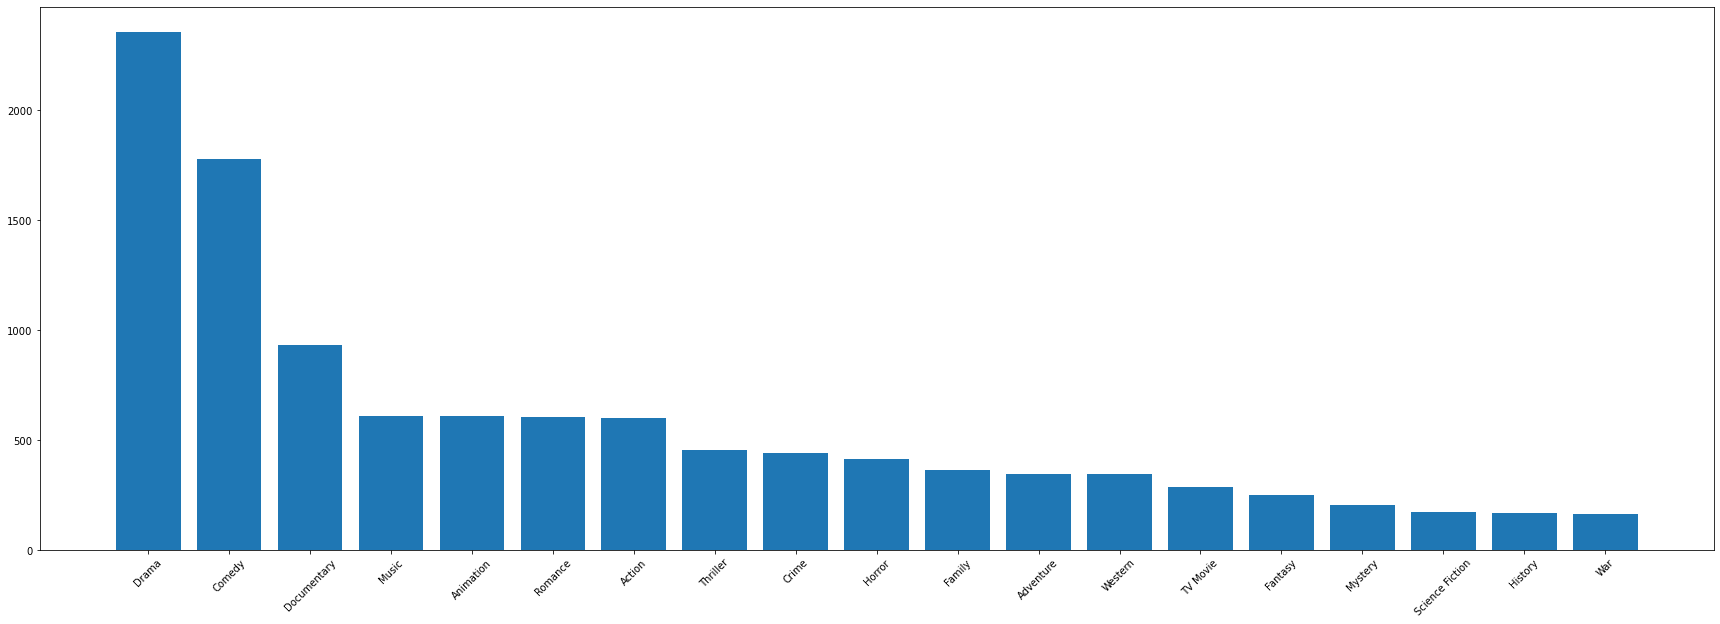

In [28]:
plt.figure(figsize=(30,10)) 
plt.bar(top30_separateClass.class_,top30_separateClass.name)
plt.xticks(rotation=45) 